In [244]:
import numpy as np
import time
def DFT(x):
    x=np.asarray(x)
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape(N,1)
    M=np.exp(-2j*np.pi*k*n/N)
    return(np.dot(M,x))

def iDFT(x):
    x=np.asarray(x)
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape(N,1)
    M=np.exp(2j*np.pi*k*n/N)
    return((1/N)*np.dot(M,x))

def FFT(x):
    x=np.asarray(x)
    N=x.shape[0]
    if N==1:
        return x
    else:
        x_even=FFT(x[::2])
        x_odd=FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([x_even + factor[:N / 2] * x_odd,
                               x_even + factor[N / 2:] * x_odd])
    
def iFFTs(x):
    x=np.asarray(x)
    N=x.shape[0]
    if N==1:
        return x
    else:
        x_even=iFFTs(x[::2])
        x_odd=iFFTs(x[1::2])
        factor = np.exp(2j * np.pi * np.arange(N) / N)
        
        return np.concatenate([x_even + factor[:N / 2] * x_odd,
                                x_even + factor[N / 2:] * x_odd])
def iFFT(x):
    x=np.asarray(x)
    N=x.shape[0]
    result=iFFTs(x)
    return result/N

In [230]:
start=5
end=14
size=end-start
fft_time=np.empty(size)
dft_time=np.empty(size)
np_time=np.empty(size)
NN=np.empty(size)
for n in range(start,end):
    i=n-start
    x=np.random.random(2**n)
    NN[i]=2**n
    t1=time.time()
    FFT(x)
    t2=time.time()
    fft_time[i]=t2-t1
    t1=time.time()
    DFT(x)
    t2=time.time()
    dft_time[i]=t2-t1
    t1=time.time()
    np.fft.fft(x)
    t2=time.time()
    np_time[i]=t2-t1

/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [226]:
import matplotlib.pyplot as plt

In [249]:
x=np.random.random(2**11)
%timeit DFT(x)

953 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


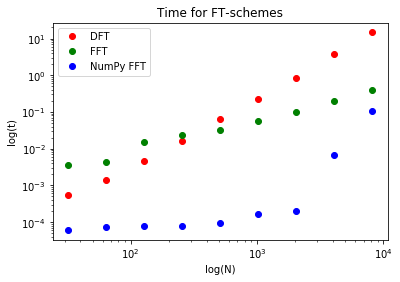

In [241]:

DFT,FFT,NP_FFT=plt.loglog(NN, dft_time,'ro',NN,fft_time,'go',NN,np_time,'bo')
plt.title('Time for FT-schemes')
plt.legend([DFT,FFT,NP_FFT],["DFT","FFT","NumPy FFT"])
plt.xlabel("log(N)")
plt.ylabel("log(t)")
plt.show()

In [198]:

x=np.random.random(1024)
a=iFFT(FFT(x))
np.allclose(a,x)
%timeit DFT(x)
%timeit FFT(x)
%timeit np.fft.fft(x)


/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


220 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


48.7 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.5 µs ± 3.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


1509858638.8068042

In [195]:
iFFT(FFT([1,2,3,4]))

/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/mats/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 1. -4.05741625e-16j,  2. -9.38587363e-17j,  3. -8.41170949e-17j,
        4. +2.16323416e-16j])

In [251]:
x=np.random.random(1024)
%timeit np.fft.fft(x)

89.3 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
